In [1]:
#Loading libraries
%matplotlib notebook

import pandas as pd
import numpy as np
import time

from sklearn.decomposition import IncrementalPCA

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import DataStream
from skmultiflow.evaluation import EvaluatePrequential

In [2]:
#Loading dataset
unsw = pd.read_csv('UNSW_NB155.csv')

In [3]:
#Checking where service is equal to -
unsw[unsw['service']=='-']

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257457,175126,0.653375,tcp,-,FIN,10,8,564,354,26.018748,...,1,1,0,0,0,18,1,0,Reconnaissance,1
257511,175180,0.695566,tcp,-,FIN,10,8,564,354,24.440528,...,1,1,0,0,0,3,1,0,Reconnaissance,1
257523,175192,0.962856,tcp,-,FIN,24,60,1256,59374,86.201883,...,1,1,0,0,0,1,1,0,Exploits,1
257609,175278,3.719110,tcp,-,FIN,66,340,3086,426483,108.897021,...,1,1,0,0,0,2,1,0,Exploits,1


In [4]:
# Replacing - with null values
unsw['service'].replace('-',np.nan,inplace=True)

In [5]:
# Dropping null values
unsw.dropna(inplace=True)

In [6]:
# Checking the shape of the dataset
unsw.shape

(116352, 45)

In [7]:
# Passing the features to one hot encoded
data = unsw[[ 'proto', 'state', 'service']]

In [8]:
# One hot encoding
data = pd.get_dummies(data)

In [9]:
# Concatenating the dataset with encoded data
dataset = pd.concat([unsw, data], axis=1)

In [10]:
# Checking the shape of the dataset
dataset.shape

(116352, 65)

In [11]:
# Dropping features that are not needed
dataset = dataset.drop(dataset[['id', 'proto', 'state', 'service', 'attack_cat']],axis=1)

In [12]:
# Splitting dataset into features and label
X = dataset.drop('label', axis=1)
y = dataset['label']

In [13]:
# Concatenating features and labels
df_full = pd.concat([X, y], axis=1)

In [14]:
# Setting the data stream
stream= DataStream (df_full, target_idx=- 1, n_targets=1, cat_features=None, name=None, allow_nan=False)

In [15]:
# Setup the classifier
classifier = SAMKNNClassifier(n_neighbors=3, weighting='uniform', max_window_size=500,
                              stm_size_option='maxACCApprox', use_ltm=False)

In [16]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, batch_size=1,
                                n_wait=500, output_file=None,
                                show_plot=True, metrics=['accuracy', 'running_time', 'model_size'])

<IPython.core.display.Javascript object>


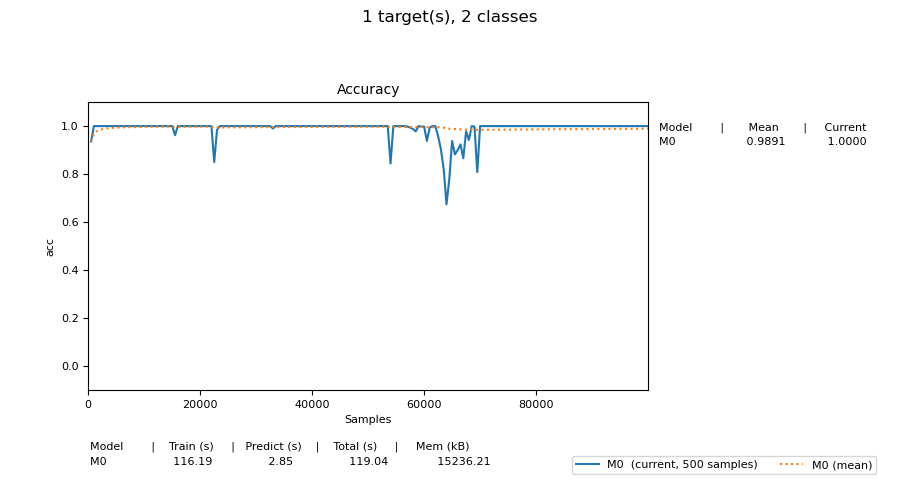

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [203.41s]
Processed samples: 100000
Mean performance:
M0 - Accuracy     : 0.9891
M0 - Training time (s)  : 116.19
M0 - Testing time  (s)  : 2.85
M0 - Total time    (s)  : 119.04
M0 - Size (kB)          : 15236.2119


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=3, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='uniform')]

In [17]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)

In [18]:
# Setting the data stream
stream= DataStream (df_full, target_idx=-1, n_targets=1, cat_features=None, name=None, allow_nan=False)

In [19]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, batch_size=1,
                                n_wait=500, output_file=None,
                                show_plot=True, metrics=['kappa','kappa_m'])

<IPython.core.display.Javascript object>


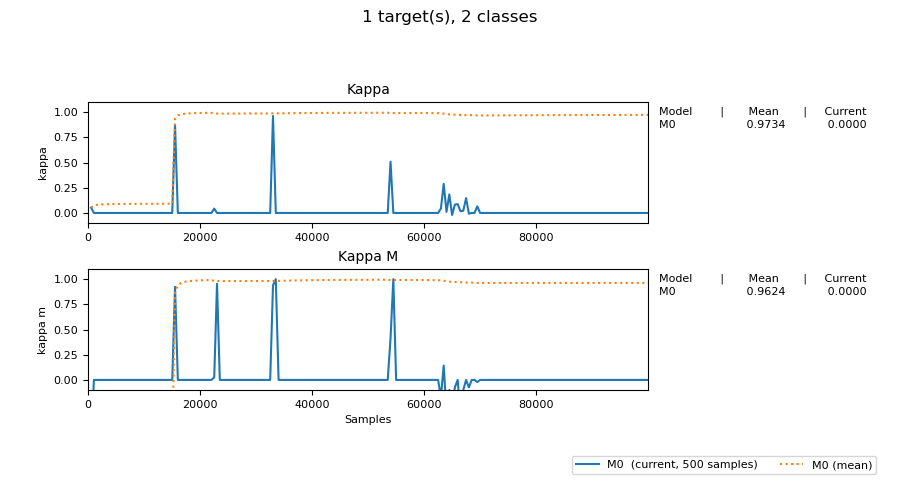

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [128.15s]
Processed samples: 100000
Mean performance:
M0 - Kappa        : 0.9734
M0 - Kappa M      : 0.9624


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=3, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='uniform')]

In [20]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)

In [21]:
# Setting the data stream
stream= DataStream (df_full, target_idx=-1, n_targets=1, cat_features=None, name=None, allow_nan=False)

In [22]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, batch_size=1,
                                n_wait=500, output_file=None,
                                show_plot=True, metrics=['precision','recall', 'f1'])

<IPython.core.display.Javascript object>


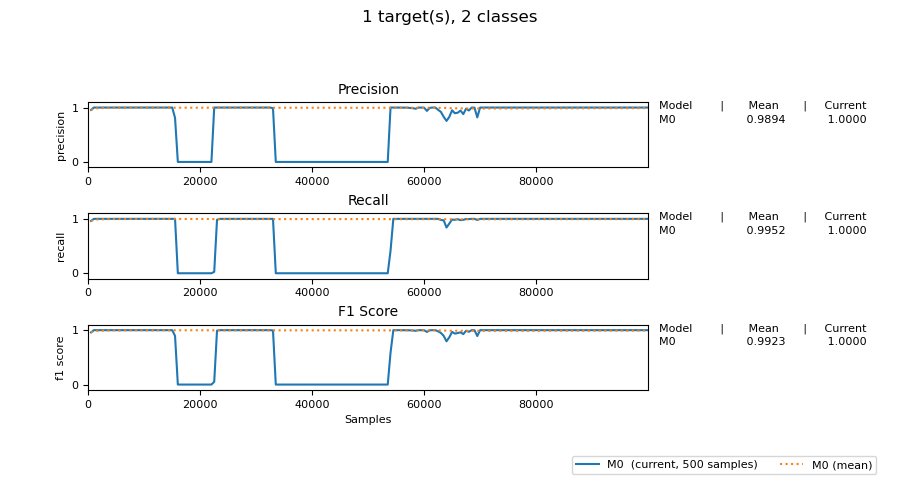

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [126.60s]
Processed samples: 100000
Mean performance:
M0 - Precision: 0.9894
M0 - Recall: 0.9952
M0 - F1 score: 0.9923


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=3, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='uniform')]

In [23]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)

In [24]:
# Viewing some rows of the dataset
dataset

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl
35,0.983874,10,8,816,1172,17.278635,62,252,5.976375e+03,8342.531250,...,0,0,1,0,0,0,0,0,0,0
40,1.535254,10,10,826,1266,12.375802,62,252,3.876883e+03,5940.385254,...,0,0,1,0,0,0,0,0,0,0
45,1.059359,10,8,830,1134,16.047441,62,252,5.641147e+03,7498.874512,...,0,0,1,0,0,0,0,0,0,0
49,0.990548,10,10,804,1414,19.181301,62,252,5.847268e+03,10281.177730,...,0,0,1,0,0,0,0,0,0,0
72,1.303518,12,8,898,1120,14.575939,62,252,5.057084e+03,6014.492676,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257667,0.000006,2,0,114,0,166666.660800,254,0,7.600000e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
257668,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
257670,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0
257671,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Slicing the dataset into features and label
X = dataset.drop('label', axis=1)
y = dataset['label']

In [26]:
# Calling the Random Over Sampler  function
ros = RandomOverSampler(random_state=42)

In [27]:
# Printing the value count of the label of the original dataset
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 87239, 0: 29113})


In [28]:
# Fitting X and y into Random Over Sampler
X_res, y_res = ros.fit_resample(X, y)

In [29]:
# Printing the value count of the label of the resampled dataset
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 87239, 1: 87239})


In [30]:
# Converting X_res into a dataframe
features = pd.DataFrame(X_res)

In [31]:
# Converting y_res into a dataframe
label = pd.DataFrame(y_res)

In [32]:
# Concatenating features and labels
ROS_BIN = pd.concat([features, label], axis=1)

In [33]:
#Saving the processed dataset 
ROS_BIN.to_csv("UNSW Balance.csv", index=False)

In [34]:
# Reading the dataset from a CSV file
df = pd.read_csv('UNSW Balance.csv')

In [35]:
stream= DataStream (df, target_idx=-1, n_targets=1, cat_features=None, name=None, allow_nan=False)

In [36]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, batch_size=1,
                                n_wait=500, output_file=None,
                                show_plot=True, metrics=['accuracy', 'running_time', 'model_size'])

<IPython.core.display.Javascript object>


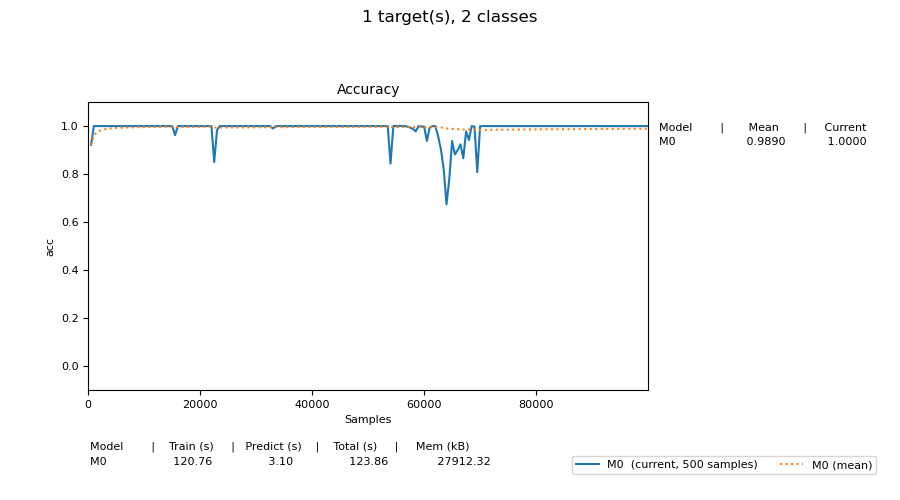

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [281.72s]
Processed samples: 100000
Mean performance:
M0 - Accuracy     : 0.9890
M0 - Training time (s)  : 120.76
M0 - Testing time  (s)  : 3.10
M0 - Total time    (s)  : 123.86
M0 - Size (kB)          : 27912.3174


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=3, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='uniform')]

In [37]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)

In [39]:
# Setting the data as a stream
stream= DataStream (df, target_idx=-1, n_targets=1, cat_features=None, name=None, allow_nan=False)

In [40]:
# Setup the evaluator
evaluator = EvaluatePrequential(pretrain_size=0, batch_size=1,
                                n_wait=500, output_file=None,
                                show_plot=True, metrics=['precision','recall', 'f1'])

<IPython.core.display.Javascript object>


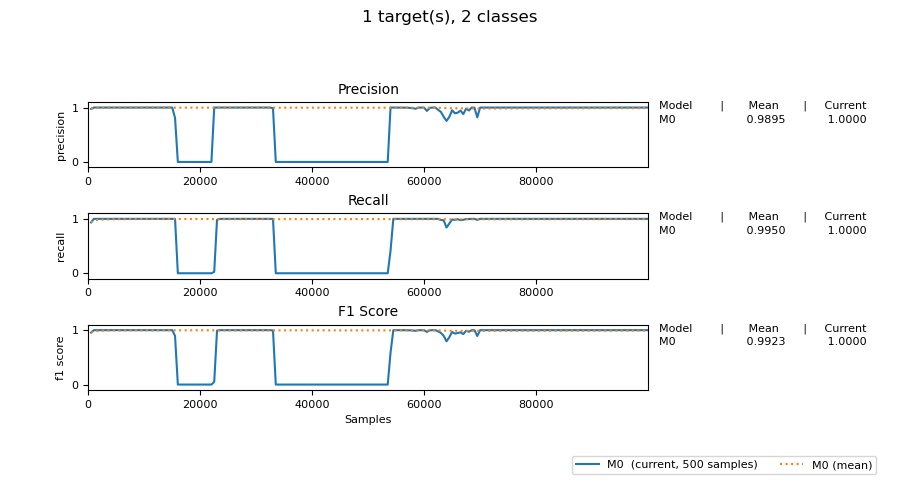

Prequential Evaluation
Evaluating 1 target(s).
Evaluating...
 #################### [100%] [126.37s]
Processed samples: 100000
Mean performance:
M0 - Precision: 0.9895
M0 - Recall: 0.9950
M0 - F1 score: 0.9923


[SAMKNNClassifier(ltm_size=0.4, max_window_size=None, min_stm_size=50,
                  n_neighbors=3, stm_size_option='maxACCApprox', use_ltm=False,
                  weighting='uniform')]

In [41]:
# Evaluate
evaluator.evaluate(stream=stream, model=classifier)